<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/Day_110_Central_Limit_Theorm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm

In [15]:
!gdown 1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS -O "weight-height.csv"

Downloading...
From: https://drive.google.com/uc?id=1V9ZFTiRKzJ8dbdD1JI5nRM1_TEVTRjGS
To: /content/weight-height.csv
100% 428k/428k [00:00<00:00, 93.7MB/s]


# CLT

In [16]:
df_hw = pd.read_csv("weight-height.csv")

In [17]:
df_hw.shape

(10000, 3)

In [18]:
df_hw.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [19]:
df_height = df_hw["Height"]

In [20]:
mu = df_height.mean() # Population mean
mu

66.36755975482124

In [21]:
sigma = df_height.std() # Population std dev
sigma

3.8475281207732293

<Axes: xlabel='Height', ylabel='Count'>

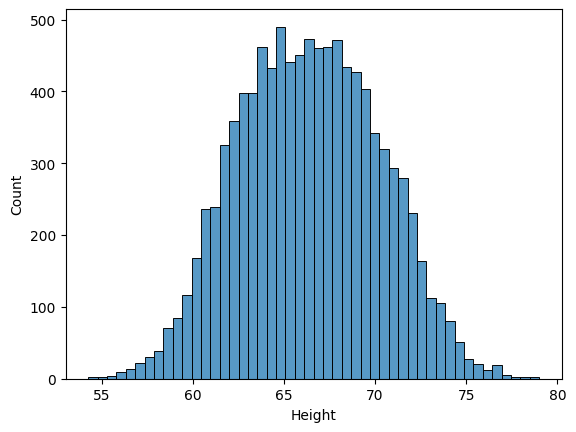

In [22]:
sns.histplot(df_height)

In [23]:
df_height.sample(5)

7614    65.638369
3661    67.810251
2304    63.472414
1346    68.997440
944     70.811262
Name: Height, dtype: float64

In [24]:
# Every time, this mean is different
# It is close to population mean of 66.3
np.mean(df_height.sample(5)) 

64.47412714544686

In [25]:
sample_mean_5 = [np.mean(df_height.sample(5)) for i in range(20000) ]

In [26]:
len(sample_mean_5)
# each of these numbers represents a sample mean of sample size 5

20000

<Axes: ylabel='Count'>

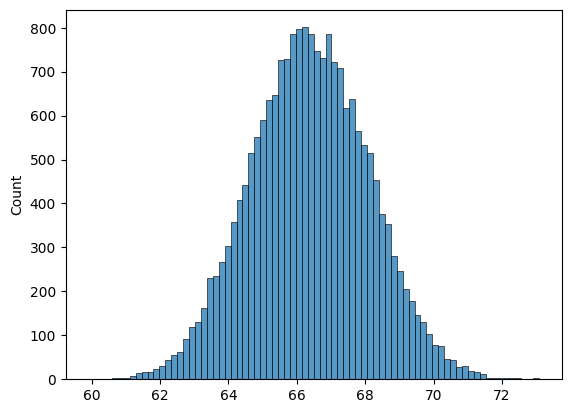

In [27]:
sns.histplot(sample_mean_5)

In [28]:
np.mean(sample_mean_5)

66.37265987678524

In [29]:
np.std(sample_mean_5)

1.7235439786143532

In [30]:
sigma/np.sqrt(5)

1.7206668846781923

Changing sample size to 20

In [31]:
np.mean(df_height.sample(20))

67.38623694026748

In [32]:
sample_mean_20 = [np.mean(df_height.sample(20)) for i in range(20000)]

In [33]:
len(sample_mean_20) 
# Each number represents a sample mean of sample size 20

20000

<Axes: ylabel='Count'>

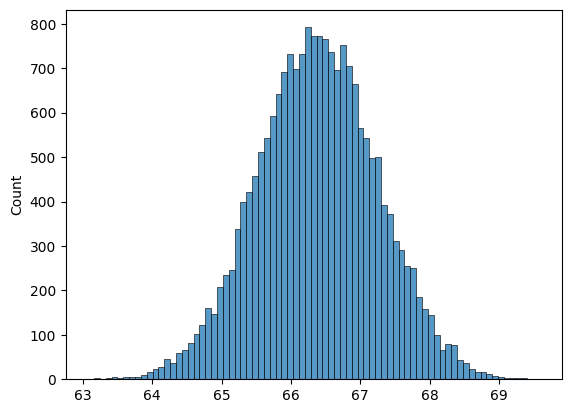

In [34]:
sns.histplot(sample_mean_20)

In [35]:
np.mean(sample_mean_20)

66.37831681398649

In [36]:
np.std(sample_mean_20)

0.862949082592929

In [37]:
sigma/np.sqrt(20)

0.8603334423390961

Change sample size to 100

In [38]:
sample_mean_100 = [np.mean(df_height.sample(100)) for i in range(20000) ] 

In [39]:
len(sample_mean_100)

20000

<Axes: ylabel='Count'>

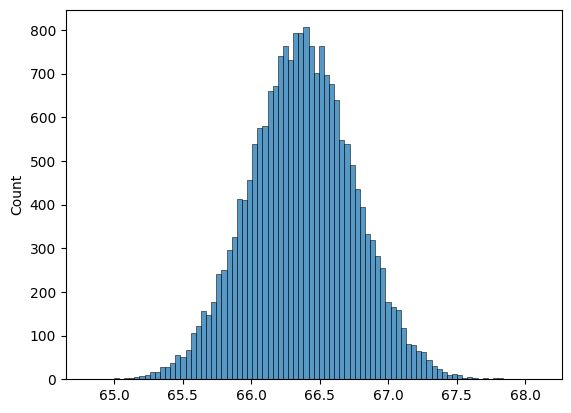

In [40]:
sns.histplot(sample_mean_100)

In [41]:
np.mean(sample_mean_100)

66.36891259270186

In [42]:
np.std(sample_mean_100)

0.38232743935851543

In [43]:
sigma/np.sqrt(100)

0.3847528120773229

# Blood pressure example

Systolic blood pressure of a group of people is known to have an average of 122 mmHg and a standard deviation of 10 mmHg

Calculate the probability that the average blood pressure of 16 people will be greater than 125 mmHg.

In [44]:
std_error = 10/np.sqrt(16)
std_error

2.5

In [45]:
z = (125 - 122)/std_error
z

1.2

In [46]:
prob = 1 - norm.cdf(z)
prob

0.11506967022170822

What if we had sampled 100 people instead of 16? What is the prob of average being greater than 125?

In [47]:
std_error = 10/np.sqrt(100)
std_error

1.0

In [48]:
z = (125 - 122)/std_error
z

3.0

In [49]:
prob = 1 - norm.cdf(z)
prob

0.0013498980316301035